# Proyecto Mate 3 Red Neuronal

Este es mi proyecto practico final de la Materia de Matematicas 3 El objetivo era desarrollar una red neuronal que se encargaria de clasificar basandose en una serie de datos ingresados como lo son el Tamaño, el Peso, el Sabor, la Blandura, el Tiempo de Recoleccion, la Dureza y la Acidez **(Datos que ya en la base de datos vienen normalizados)**, determinar si la calidad de la banana es Buena o Mala

**Link del Datasets=** https://www.kaggle.com/datasets/l3llff/banana

Comienzo cargando tanto las librerias **Numpy** y **Pandas** junto a los datos de la base de datos **"Banana_quality.csv"**
y muestro su carga exitosa con el **data.head()**

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


from google.colab import files
ec= files.upload()

data = pd.read_csv("banana_quality.csv")
np.random.seed(5)

data.head()

Saving banana_quality.csv to banana_quality.csv


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


Con el **Data.Describe()** hago un analisis general de los datos dentro del archivo, datos que como se especifico al inicio ya de base estan normalizados para su uso

In [2]:
data.describe()
#Los datos ya vienen normalizados

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


**FASE EXPERIMENTAL**
**--PREGUNTAR SI ES NECESARIO ELIMINAR POSIBLES DATOS ATIPICOS--**

In [18]:
#Fase Experimental
numero=data.shape[0]
ordenada=data.sort_values(["Size","Weight","Sweetness","Softness","HarvestTime","Ripeness","Acidity"])
porcentaje=5/100
quitar=int(numero*porcentaje)
print(numero)
print(quitar)
limite_superior=numero-quitar
df=ordenada.iloc[(quitar+1):(limite_superior+1)]
df

8000
400


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
7097,-4.023977,0.654556,-0.572687,2.203311,-1.977343,1.278287,1.835030,0
6389,-4.023012,-2.172422,-0.983490,1.884026,0.690357,-2.690739,2.376538,0
3226,-4.018339,0.023785,-0.052575,-0.574066,-2.185440,0.604574,-2.273665,0
640,-4.013335,2.739609,-0.043728,0.267962,-1.440942,0.025415,-0.372191,1
2187,-4.011955,-2.773161,-0.622481,-1.572818,-1.425747,0.352817,-0.862497,0
...,...,...,...,...,...,...,...,...
4960,2.998116,1.099174,-3.083361,0.778744,0.428418,-0.733579,1.146669,1
4457,2.999632,-2.379863,-2.168804,-1.332459,4.189579,0.274924,0.181694,1
4957,3.000185,-3.708483,1.529684,0.875066,1.083304,5.208623,-5.363782,1
4092,3.000212,-1.521165,-2.668864,-0.895829,2.751165,-0.419448,0.843174,1


In [19]:
#Fase Experimental
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,-0.781935,-0.788589,-0.739075,-0.074388,-0.773634,0.807560,0.001329,0.492778
std,1.714990,2.053755,1.974452,2.070149,1.919123,2.147271,2.307874,0.499983
min,-4.023977,-8.283002,-6.434022,-6.959320,-7.164973,-6.782773,-8.226977,0.000000
25%,-2.119012,-2.308796,-2.102393,-1.679158,-2.084841,-0.583665,-1.660684,0.000000
50%,-0.897270,-0.923281,-1.017276,0.142192,-0.951401,1.019242,0.113215,0.000000
75%,0.454220,0.787705,0.361950,1.483030,0.412173,2.334109,1.690731,1.000000
max,3.003163,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633,1.000000


Verifico si existen valores nulos o vacios dentro de **"Banana_quality.csv"** antes de su uso, y el resultado final demuestra que no hay espacio vacios o nulos dentro del archivo

In [3]:
#Verificar si existen valores nulos o vacios

data.isnull().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

Antes de empezar a usar los datos, es necesario que transforme la Columna **"Quality"** en datos numericos **Good=1 Bad=0**, para despues con el **Data.Head()** y el **Data.Tail()** verificar que se realizo el cambio

In [5]:
#Transformar los valores de la columna Quality en valores numericos Bueno=1 Malo=0

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
for i in ['Quality']:
    data[i] = encode.fit_transform(data[i])

#Primeros elementos
data.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


In [6]:
#Ultimos elementos
data.tail()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,0
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,0
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,0
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,0
7999,-2.660879,-2.044666,0.159026,1.499706,-1.581856,-1.605859,1.435644,0


Muestro la correlacion que existe entre las columnas a trabajar y su porcentaje de correlacion (Que en este caso la que nos interesa es con la columna **"Quality"**)

<Axes: >

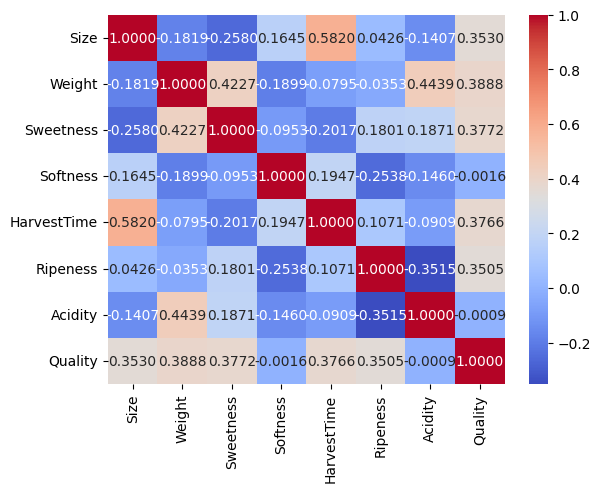

In [21]:
#Grafica y Correlacion
import seaborn as sns
df = data.copy()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".4f")

(5600, 7)
(2400, 7)
(5600,)
(2400,)
Precision =  25.59 %
Precision Mejorable =  80.0 %


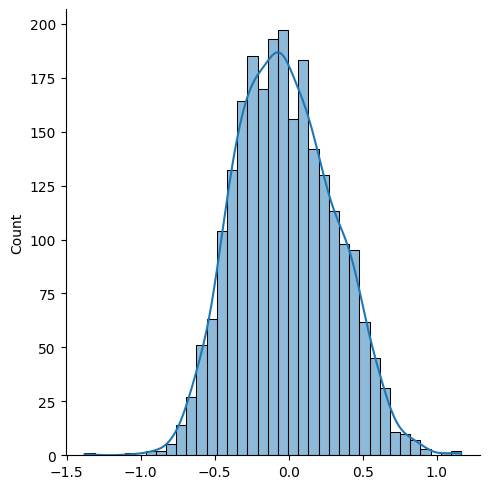

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns

# Extraer columnas de entrada, todas excepto la ultima Quality

x = data.iloc[:,0:7].values

# Extraer columna de Quality

y = data.iloc[:, 7].values

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.30)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

regression = LinearRegression()
regression.fit(X_train,Y_train)

reg_predict = regression.predict(X_test)

score = r2_score(reg_predict, Y_test)
print("Precision = ", float("{:.2f}".format(score*100)), "%")

gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, Y_train)
boosted_score = gbr.score(X_test, Y_test)
print("Precision Mejorable = ", float("{:.2f}".format(boosted_score*100)), "%")
sns.displot(reg_predict-Y_test, kde = True)

Grafica que muestra el porcentaje o division de **"Buenas" y "Malas"** bananas dentro de la Columna **"Quality"**, estando es este caso divididas **50% 50%**

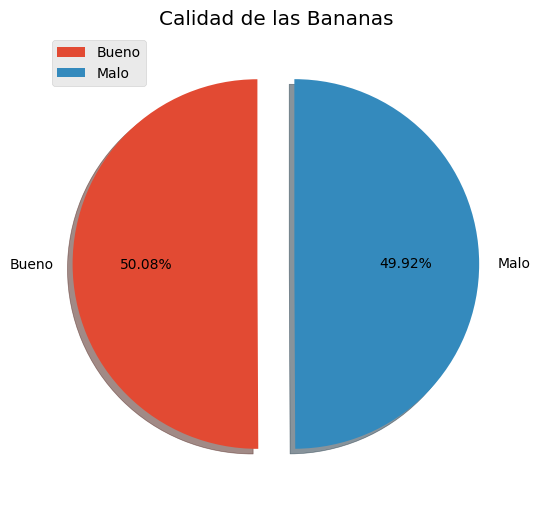

In [ ]:
#Grafica de porcentaje de bananas Buenas y Malas

import matplotlib.pyplot as plt

plt.figure(figsize=[6,6])
valores=["Bueno","Malo"]
plt.style.use('ggplot')
plt.title("Calidad de las Bananas")
plt.pie(data['Quality'].value_counts(),labels=valores,autopct='%.2f%%',shadow=True,explode=(0.1,0.1),startangle=90)
plt.axis=('equal')
plt.legend(loc="upper left")

plt.show()

Apartir de este momento es que comienza lo que seria la Red Neuronal, donde para probar y optimizar posibles cambios esta empieza con una Seed especifica

Para este proceso combine tanto lo que seria el cuerpo de la Red Neuronal con su parte de entrenamiento, con una tasa de aprendizaje de **0.05** y con un total de **1_000_000** repeticiones, en un principio para datos de entrada se habian dejado de lado 2 de las 7 columnas (Exceptuando obviamente la ultima **"Quality"** que tomaria el papel de los valores de Salida) por su baja relacion, pero tras pruebas y consejos del profesor, decidi incluirlas, cosa que aumento el porcentaje de precision de un **84%** casi **85%** aun casi **90%**

Como Valores de Entrenamiento y Prueba, se tomo una relacion **70% 30%** para el entrenamiento, donde con un total de **8000** filas, se toman **5400** para el entrenamiento y los otros **2600** para las pruebas, donde en el Descenso de Gradiente en cada vuelta se toma una nueva fila aleatoria con el objetivo de evitar un **Overfitting**

In [ ]:
np.random.seed(5) #Cargo la semilla

aprendizaje = 0.05  # tasa de aprendizaje

# Extraer columnas de entrada (Size,Weight,Sweetness,HarvestTime,Ripeness)
#entrada = data.iloc[:,[0,1,2,4,5]].values (Omitiendo la columna 3 y 6)

entrada = data.iloc[:,0:7].values #Todas las columnas excepto la ultima (Ingreso 7 entradas)

# Extraer columna de Quality
salida = data.iloc[:, 7].values

# Dividir los conjuntos de datos de entrenamiento y prueba
# 30 % en prueba y un 70 % en entrenamiento

X_train, X_test, Y_train, Y_test = train_test_split(entrada, salida,
    test_size=0.30)
n = X_train.shape[0]
print("se estan tomando",n,"Datos de entrenamiento")

# Construir red neuronal con pesos y sesgos inicializados aleatoriamente

w_hidden = np.random.rand(7, 7)
w_output = np.random.rand(1, 7)

b_hidden = np.random.rand(7, 1)
b_output = np.random.rand(1, 1)

# Funciones de activacion

relu = lambda x: np.maximum(x, 0)
logistic = lambda x: 1 / (1 + np.exp(-x))

# Ejecutar entradas a traves de la red neuronal para obtener salidas predichas

def forward_prop(X):
    Z1 = w_hidden @ X + b_hidden
    A1 = relu(Z1)
    Z2 = w_output @ A1 + b_output
    A2 = logistic(Z2)
    return Z1, A1, Z2, A2

# Derivadas de las funciones de activacion

d_relu = lambda x: x > 0
d_logistic = lambda x: np.exp(-x) / (1 + np.exp(-x)) ** 2

# Devuelve pendientes para pesos y sesgos usando la regla de la cadena

def backward_prop(Z1, A1, Z2, A2, X, Y):
    dC_dA2 = 2 * A2 - 2 * Y
    dA2_dZ2 = d_logistic(Z2)
    dZ2_dA1 = w_output
    dZ2_dW2 = A1
    dZ2_dB2 = 1
    dA1_dZ1 = d_relu(Z1)
    dZ1_dW1 = X
    dZ1_dB1 = 1

    dC_dW2 = dC_dA2 @ dA2_dZ2 @ dZ2_dW2.T

    dC_dB2 = dC_dA2 @ dA2_dZ2 * dZ2_dB2

    dC_dA1 = dC_dA2 @ dA2_dZ2 @ dZ2_dA1

    dC_dW1 = dC_dA1 @ dA1_dZ1 @ dZ1_dW1.T

    dC_dB1 = dC_dA1 @ dA1_dZ1 * dZ1_dB1

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2

# Descenso de Gradiente

for i in range(1_000_000):

    # selecciona aleatoriamente uno de los datos de entrenamiento

    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx]

    # pasamos los datos elegidos aleatoriamente a la red neuronal

    Z1, A1, Z2, A2 = forward_prop(X_sample)

    # distribuir error a través de la retropropagacion
    # y devolver pendientes para pesos y sesgos

    dW1, dB1, dW2, dB2 = backward_prop(Z1, A1, Z2, A2, X_sample, Y_sample)

    # actualizamos los pesos y sesgos

    w_hidden -= aprendizaje * dW1
    b_hidden -= aprendizaje * dB1
    w_output -= aprendizaje * dW2
    b_output -= aprendizaje * dB2

# Calculo de precisión

test_predictions = forward_prop(X_test.transpose())[3] # me interesa solo la capa de salida, A2
print(test_predictions)
test_comparisons = np.equal((test_predictions >= .5).flatten().astype(int), Y_test)
print(test_comparisons)
presicion = sum(test_comparisons.astype(int) / X_test.shape[0])
print("Precision: ", presicion)


se estan tomando 5600 Datos de entrenamiento
[[0.09445322 0.09445322 0.09445322 ... 0.09445322 0.09445322 0.09445322]]
[ True  True  True ...  True False  True]
Precision:  0.8816666666666327


Aqui se pone en practica la red neuronal tras una vez entrenada, donde su labor es una vez ingresados los datos del Tamaño, el Peso, el Sabor, la Blandura, el Tiempo de Recoleccion, la Dureza y la Acidez de la banana, la Red Neuronal debera predecir haciendo uso de **Relu** y **Logistic**, si el calculo final da mayor a **0.5** debera devolver que la Banana esta **"Buena"**, y si no es el caso, devolvera **"Mala"**

In [ ]:
#Ingreso de datos de la banana y su prediccion

def predict_probability(Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity):
    X = np.array([[Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity]]).transpose()
    Z1, A1, Z2, A2 = forward_prop(X)
    return A2

def predict_font_shade(Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity):
    output_values = predict_probability(Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity)
    print(output_values)
    if output_values > .5:
        return "Bueno"
    else:
        return "Malo"

Size=float(input("Ingrese el Tamaño:"))
Weight=float(input("Ingrese el Peso:"))
Sweetness=float(input("Ingrese la Sabor:"))
Softness=float(input("Ingrese la Blandura:"))
HarvestTime=float(input("Ingrese el Tiempo de Recoger:"))
Ripeness=float(input("Ingrese la Dureza:"))
Acidity=float(input("Ingrese la Acidez:"))
print("Tras el analisis la red neuronal determina que esa banana esta",predict_font_shade(Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity))



Ingrese el Tamaño:-1.4831107
Ingrese el Peso:-0.8823692
Ingrese la Sabor:0.96557415
Ingrese la Blandura:-4.695425
Ingrese el Tiempo de Recoger:-1.3529714
Ingrese la Dureza:3.3418584
Ingrese la Acidez:2.669173
[[1.]]
Tras el analisis la red neuronal determina que esa banana esta Bueno


Esta es una Comparacion usando el metodo de Scikit-Learn, tanto como red neuronal como en precision

Se empieza nuevamente con la misma semilla, tasa de aprendizaje, repeticiones y division de elementos **70% Entrenamiento 30% Prueba**, pero a comparacion de la red neuronal hecha a mano, en el calculo final de precision esta demuestra un casi **98%** de exactitud tras entrenarse, casi un **10%** mas que la anterior, donde al final a la hora de ingresarle los valores de la banana, tambien logro dar una prediccion correcta sobre la Calidad **"Quality"**    

In [ ]:
# Comparacion usando scikit-learn

np.random.seed(5) #Cargo la semilla

# cargar datos
from sklearn.neural_network import MLPClassifier

# Extraer variables de entrada (todas las filas, todas las columnas menos la ultima)
X = data.values[:,0:7]

# Extraer columna de salida (todas las filas, ultima columna)
Y = data.values[:, 7]

# Separar los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

nn = MLPClassifier(solver='sgd',
                   hidden_layer_sizes=(7, ),
                   activation='relu',
                   max_iter=1_000_000,
                   learning_rate_init=0.05)

nn.fit(X_train, Y_train)

# Imprimir pesos y sesgos
print(nn.coefs_)
print(nn.intercepts_)

print("Puntaje del Entrenamiento: %f" % nn.score(X_train, Y_train))
print("Puntaje de la Prueba: %f" % nn.score(X_test, Y_test))


[array([[ 0.1855423 , -0.25771569, -0.1355049 ,  0.3194105 ,  0.92406692,
         0.38243892, -0.62550396],
       [ 0.51522885,  1.18542529, -0.87058998, -1.08163119, -1.52455817,
        -0.7917107 ,  0.06377759],
       [-0.6467388 ,  1.08055102, -0.43771653, -0.46791682, -1.10021326,
        -0.02542919, -0.38070736],
       [-0.1668092 , -1.0146121 ,  1.28470996, -0.24071607,  1.3051782 ,
         0.83453973,  0.6497916 ],
       [ 0.62923419, -0.23465614,  0.45071041, -0.22164031,  0.90447592,
         0.35336913, -0.70795924],
       [ 0.28105684,  0.20519962,  0.48077773, -0.89843713, -0.99149701,
        -1.07756922, -0.97641662],
       [-0.79742522, -0.03430356,  0.71960941, -0.89315904, -0.78995855,
         0.11202351,  0.30125312]]), array([[-2.39437679],
       [ 0.95406453],
       [-1.14198105],
       [-1.50869007],
       [ 1.86720623],
       [-1.83495926],
       [-0.57409977]])]
[array([-2.90053711, -0.12574813,  0.72510276,  2.1568343 ,  0.98419343,
       -1.56

In [ ]:
#Ingreso de datos de la banana y su prediccion, ahora usando el modelo de scikit-learn

def prediccion(Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity) :
   valores=(Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity)
   valores = np.array(valores).reshape(1, -1)
   resultado=nn.predict(valores)
   print("prediccion:", resultado)
   if resultado > 0.5:
      return "Bueno"
   else:
      return "Malo"

Size=float(input("Ingrese el Tamaño:"))
Weight=float(input("Ingrese el Peso:"))
Sweetness=float(input("Ingrese la Sabor:"))
Softness=float(input("Ingrese la Blandura:"))
HarvestTime=float(input("Ingrese el Tiempo de Recoger:"))
Ripeness=float(input("Ingrese la Dureza:"))
Acidity=float(input("Ingrese la Acidez:"))
print("Tras el analisis la red neuronal determina que esa banana esta",prediccion(Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity))



Ingrese el Tamaño:-1.4831107
Ingrese el Peso:-0.8823692
Ingrese la Sabor:0.96557415
Ingrese la Blandura:-4.695425
Ingrese el Tiempo de Recoger:-1.3529714
Ingrese la Dureza:3.3418584
Ingrese la Acidez:2.669173
prediccion: [1.]
Tras el analisis la red neuronal determina que esa banana esta Bueno
